<a href="https://colab.research.google.com/github/pkong0414/Deep-Learning-Projects/blob/master/Copy_of_clockAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing library

import keras
import os, shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#use this when you use google colab only!
from google.colab import files, drive
import glob
import pandas as pd
import io
import numpy as np
import cv2
from PIL import Image

Using TensorFlow backend.


Created by: Patrick Kong, Cody Hawkings
                
    clockAI project:
    
    This clock ai would aim to use computervision in order to read a clock's time.
    It would be able to read digital and more importantly analog clocks.
    
    We will be using google colab for this project.

In [0]:
#loading files to us
uploaded = files.upload()

Saving test_validation.csv to test_validation.csv


In [0]:
uploaded = files.upload()

AttributeError: ignored

In [0]:
#loading image to img
img = image.load_img( 'pic_61.JPG', target_size=( 50, 50 ) )

Loading image into img.

target size was originally supposed to be 28x28 but the image is too blurry. Will try to make image a bit bigger, maybe 50x50.

50x50 is still too blurry but I think there is enough to work with.

In [0]:
#outputing image
plt.imshow( img )


printing img to display input.

In [0]:
#outputing image in greyscale
plt.matshow( img, cmap = 'gray' )

using grayscale to make things easier.

In [0]:
#outputing image in an array format

print( img )


In [0]:
drive.mount( '/content/drive' )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Using google mount to load the files into google colab.

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/Clocks"

'All Clocks.zip'  'Analog Clock'  'Digital Clock'   temp   test_validation.csv


In [0]:
#file directory for analog
base_A_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/Analog Clock/test_val_analog.csv"

#file directory for digital
base_D_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/Digital Clock"

#file directory for all images
images = "/content/drive/My Drive/Colab Notebooks/Clocks/All Clocks"

#file directory for target (labels)
base_LA_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/test_val_analog.csv"
base_LD_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/test_val_digital.csv"

file = open( "test_validation.csv", "r" )
train_labels = []
train_filenames = []


text=[]
for files in file:
  text = files.split( "," )
  train_labels.append( text[ 1 ].strip( '\n' ) )
  train_filenames.append( text[ 0 ].strip( '28x28' ) )
  
print( train_labels[ : ] )
print( train_filenames[ : ] )
  
# import zipfile


# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Clocks/All Clocks.zip", 'r')
# zip_ref.extractall("/content/drive/My Drive/Colab Notebooks/Clocks/temp")
# #zip_ref.printdir()

train_data = "/content/drive/My Drive/Colab Notebooks/Clocks/temp"

temp = "/content/drive/My Drive/Colab Notebooks/Clocks/temp/pic_1.JPG"

print( os.path.isdir( train_data ) )

temp2 = []

image = []

for items in os.listdir( train_data ):
  temp2 = os.path.join( train_data, items )
  image.append( temp2 )

print( image[ : ] )






#train_data = train_Analog_
 

['12:00', '12:01', '12:02', '12:03', '12:04', '12:05', '12:06', '12:07', '12:08', '12:09', '12:10', '12:11', '12:12', '12:13', '12:14', '12:15', '12:16', '12:17', '12:18', '12:19', '12:20', '12:21', '12:22', '12:23', '12:24', '12:25', '12:26', '12:27', '12:28', '12:29', '12:30', '12:31', '12:32', '12:33', '12:34', '12:35', '12:36', '12:37', '12:38', '12:39', '12:40', '12:41', '12:42', '12:43', '12:44', '12:45', '12:46', '12:47', '12:48', '12:49', '12:50', '12:51', '12:52', '12:53', '12:54', '12:55', '12:56', '12:57', '12:58', '12:59', '1:00', '1:01', '1:02', '1:03', '1:04', '1:05', '1:06', '1:07', '1:08', '1:09', '1:10', '1:11', '1:12', '1:13', '1:14', '1:15', '1:16', '1:17', '1:18', '1:19', '1:20', '1:21', '1:22', '1:23', '1:24', '1:25', '1:26', '1:27', '1:28', '1:29', '1:30', '1:31', '1:32', '1:33', '1:34', '1:35', '1:36', '1:37', '1:38', '1:39', '1:40', '1:41', '1:42', '1:43', '1:44', '1:45', '1:46', '1:47', '1:48', '1:49', '1:50', '1:51', '1:52', '1:53', '1:54', '1:55', '1:56', '1:

In [0]:

print( len( image ) )

1438


In [0]:
print( len( images ) )

1438


<Figure size 432x288 with 0 Axes>

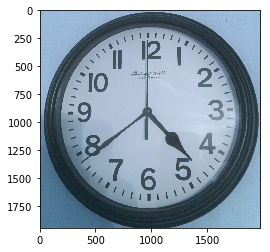

<Figure size 432x288 with 0 Axes>

In [0]:
img = cv2.imread( image[ 647 ] )
#img_cvt=cv2.cvtColor( img, cv2.COLOR_BGR2RGB )
plt.imshow( img )
plt.figure()


visualizing input in an array format.

In [0]:
k = 4
num_val_samples = sum( [ len( files ) for _, _, files in os.walk( train_data ) ] ) 
num_epochs = 100
num_scores = []

for i in range( k ):
  print( 'processing fold #', i )
  val_data = images[ i * num_val_samples: ( i + 1 ) * num_val_samples ]
  val_targets = train_targets[ i * num_val_samples: ( i + 1 ) * num_val_samples ]
  
#   partial_train_data = np.concatenate(
#     [ train_data[ :i * num_val_samples ],
#      train_data[ ( i + 1 ) * num_val_samples: ] ],
#     axis = 0 )
  
#   partial_train_targets = np.concatenate(
#     [ train_targets[ :i * num_val_samples ],
#      train_targets[ ( i + 1 ) * num_val_samples: ] ],
#     axis = 0 )
  
  

This is the k folding snippet we'll use to get our split our training and validation data.

In [0]:
print( val_targets )

Sanity test for the files.

In [0]:
#data gen

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator( rescale=1./255 )
test_datagen = ImageDataGenerator( rescale=1./255 )

# Specify how the ImageDataGenerator will read and deliver
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size = ( 150, 150 ),
        batch_size = 20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical' )

#functions

def annotate_theta( img, labels ):
  #this will be a series of characters read from a csv
  time[]
  theta[]
  radius[]
  
  #this will read from the csv labels and calculate the appropriate theta
  #for the minute hand
  
  #this will read the label and calculate the theta for the
  #hour hand now
  for i in range( len( labels ) ):
    if len( labels[ i ] > 3 ):
      time[ 1: ] = labels[ i ].split( ':' )
      radius[ 1 ] = 4
      theta[ 0 ] = ( 0.5 * int( time[ :2 ] ) )
      theta[ 1 ] = ( 6 * int( time[ 2: ] ) )
    elif len( labels[ i ] == 3):
      time[ 0 ] = '0'
      time[ 1: ] = labels[ i ].split( ':' )
      radius[ 0 ] = 2
      theta[ 0 ] = ( 0.5 * int( time[ :2 ] ) )
      theta[ 1 ] = ( 6 * int( time[ 2: ] ) )
  
  return radius, theta
  

def loading_dataset(img, labels):
  
  
  r, t = annotate_theta( img, labels )
  
  #once we annotated radius and theta into r and t
  #we will load it into a format of:
  #dataset = [ img, r(hour), t(hour), r(minute), t(minute) ]
  
  dataset = load
  
  return X, Y


def residual_unit( inputs, filters, kernel, drop_out = 0.0, pooling = False )
  res = inputs
  
  if pooling == True:
    res = conv2D( filters, kernel_size = 1, strides = ( 2, 2) )
    inputs = MaxPooling2d( pool_size = ( 2, 2 ) )
    
  inputs = BatchNormalization()( inputs )
  inputs = conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = activation( "relu" )( inputs )
  inputs = Dropout( drop_out )( inputs )
  inputs = BatchNormalization( inputs )
  inputs = conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = activation( "relu" )( inputs )
  
  inputs = keras.layers.add( [ inputs, res ] )
  
  return inputs

#main function
inputs, output = loading dataset()

model = models.Sequential()




model.save( 'clock_ai_0.1.h5' )


Gameplan is to use polar coordinates in order to give an additional feature to the learning model during training.

Initially considered using pixels to calculate theta since arctan( y / x ) will give us the angle of the clock hand.
However, since the pixels were blurry compounded by the fact that the conditions to make theta happen is complex, an alternative was considered.

Rather than use X and Y to calculate theta, the idea is then to use degree of 360 and divide by units of 60 ( which represent the minutes ). This gives us 6 degrees of movement per ***"minute"***.

For the ***"Hour"*** hand we know that the hand moves 5 minute units to move to the next hour. 5 * 6 gives us 30 degrees per hour, so if we take 30 degree /60 minutes we get 0.5 degrees/minute.

Same idea will be applied to the hour-hand cause this would be the one that gives the model problem since the hour-hand moves as the minute hand moves and makes things a little harder to do for the hour identification.

( 4/29/19 )

*added k folding so we can get our training and validation split accordingly for the small sample size

*added residual unit function which will allow us to make residual units with dropout and pooling capabilities

*added annotation function which will generate the other portion of input the network will be using to learn

*Data generator has been added but hasn't been customized to work with this problem

